# Getting started

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing dataset
main_data = pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')
main_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
bike_count = main_data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [4]:
bike_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Radiation              8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [5]:
bike_count['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [6]:
bike_count['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [7]:
bike_count.describe()

Rented Bike Count         Hour  Temperature     Humidity   Wind speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew point temperature    Radiation     Rainfall  \
count  8760.000000            8760.000000  8760.000000  8760.000000   
mean   1436.825799               4.073813     0.569111     0.148687   
std     608.298712              13.060369     0.868746     1.128193   
min      27.000000             -30.600000     0.000000     0.000000   
25%     940.000000              -4.700000     0.000000     0.000000   
50%    1698.000000               5.100000     0.010000     0.000000   
75%    2000.000000              14.800000     0.930000     0.000000   
max    2000.000000              27.200000     3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

In [8]:
import datetime
import calendar

def findDay(date):
    born = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return calendar.day_name[born]

bike_count['Weekday'] = [findDay(date) for date in bike_count['Date']]

print(bike_count)

            Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0     01/12/2017                254     0         -5.2        37         2.2   
1     01/12/2017                204     1         -5.5        38         0.8   
2     01/12/2017                173     2         -6.0        39         1.0   
3     01/12/2017                107     3         -6.2        40         0.9   
4     01/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature

In [9]:
def categorize_time(hour):
    if 0 <= hour <= 4:
        return 'Night'
    elif 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the custom function to create a new column with the time categories
bike_count['Time of day'] = bike_count['Hour'].apply(categorize_time)

# Display the updated DataFrame
print(bike_count)

            Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0     01/12/2017                254     0         -5.2        37         2.2   
1     01/12/2017                204     1         -5.5        38         0.8   
2     01/12/2017                173     2         -6.0        39         1.0   
3     01/12/2017                107     3         -6.2        40         0.9   
4     01/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature

In [10]:
bike_count['Time of day'].value_counts()

Time of day
Night        2920
Morning      2555
Evening      1825
Afternoon    1460
Name: count, dtype: int64

In [11]:
bike_count['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [12]:
bike_count.drop(columns=["Functioning Day", "Date", 'Hour'], inplace=True)

# Exploratory Data Analysis

In [13]:
rentedBikeData = main_data.copy()

In [14]:
df = rentedBikeData.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [15]:
import datetime
import calendar

def findDay(date):
    born = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return calendar.day_name[born]

df['Weekday'] = [findDay(date) for date in df['Date']]

df.head(2)

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   

   Visibility  Dew point temperature  Radiation  Rainfall  Snowfall Seasons  \
0        2000                  -17.6        0.0       0.0       0.0  Winter   
1        2000                  -17.6        0.0       0.0       0.0  Winter   

      Holiday Functioning Day Weekday  
0  No Holiday             Yes  Friday  
1  No Holiday             Yes  Friday

In [16]:
def categorize_time(hour):
    if 0 <= hour <= 4:
        return 'Night'
    elif 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the custom function to create a new column with the time categories
df['Time of day'] = df['Hour'].apply(categorize_time)

# Display the updated DataFrame
df.head(2)

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   

   Visibility  Dew point temperature  Radiation  Rainfall  Snowfall Seasons  \
0        2000                  -17.6        0.0       0.0       0.0  Winter   
1        2000                  -17.6        0.0       0.0       0.0  Winter   

      Holiday Functioning Day Weekday Time of day  
0  No Holiday             Yes  Friday       Night  
1  No Holiday             Yes  Friday       Night

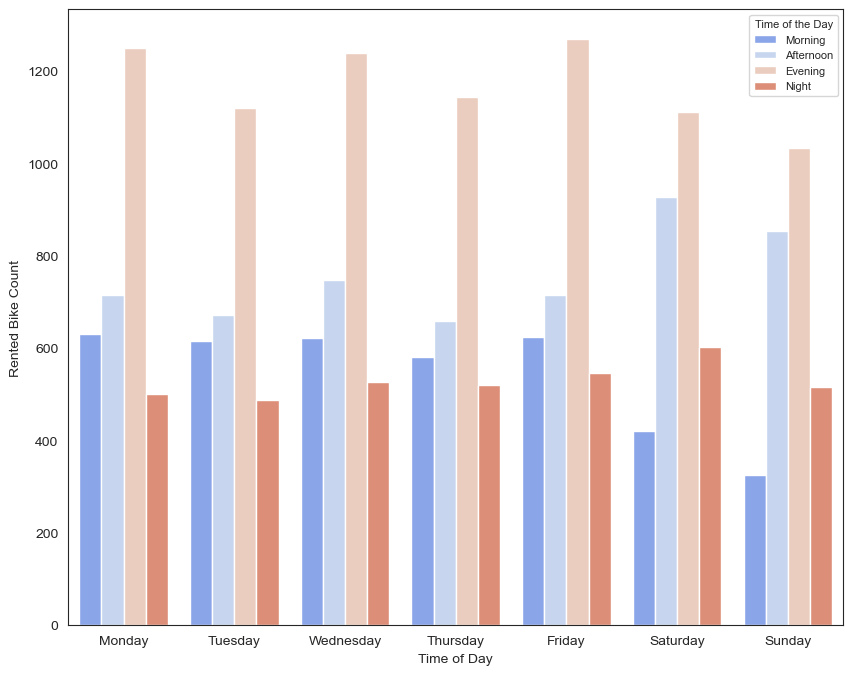

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set_style("white")

time_of_day_palette = "coolwarm"
time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.barplot(x='Weekday', y='Rented Bike Count', hue='Time of day', order=weekday_order, hue_order=time_of_day_order, palette=time_of_day_palette, data=df, errorbar=None)
plt.xlabel('Time of Day', fontsize=10)
plt.ylabel('Rented Bike Count', fontsize=10)
plt.legend(title='Time of the Day', title_fontsize='8', fontsize='8')
plt.show()

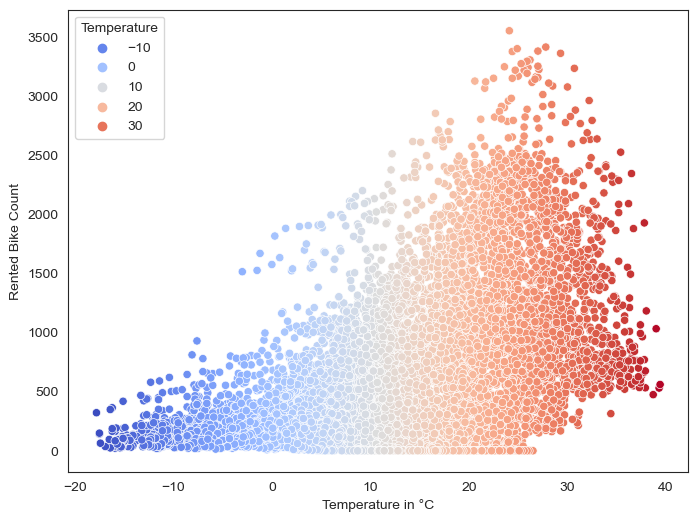

In [18]:
plt.figure(figsize=(8, 6))

cmap = sns.color_palette("coolwarm", as_cmap=True)

combined_df = pd.concat([df[df['Holiday'] == 'No Holiday'], df[df['Holiday'] == 'Holiday']])

sns.scatterplot(x='Temperature', y='Rented Bike Count', hue='Temperature', data=combined_df, palette=cmap)

plt.xlabel('Temperature in °C', fontsize=10)
plt.ylabel('Rented Bike Count', fontsize=10)

plt.legend(title='Temperature', fontsize=10, loc='upper left', bbox_to_anchor=(0, 1))
plt.show()

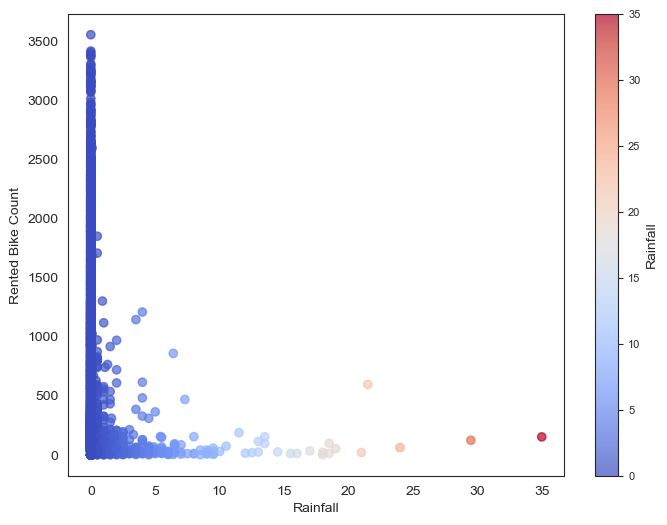

In [19]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df['Rainfall'], df['Rented Bike Count'], c=df['Rainfall'], cmap='coolwarm', alpha=0.7)
cbar = plt.colorbar(scatter, label='Rainfall')

cbar.ax.tick_params(labelsize=8)

plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Rented Bike Count', fontsize=10)
plt.show()

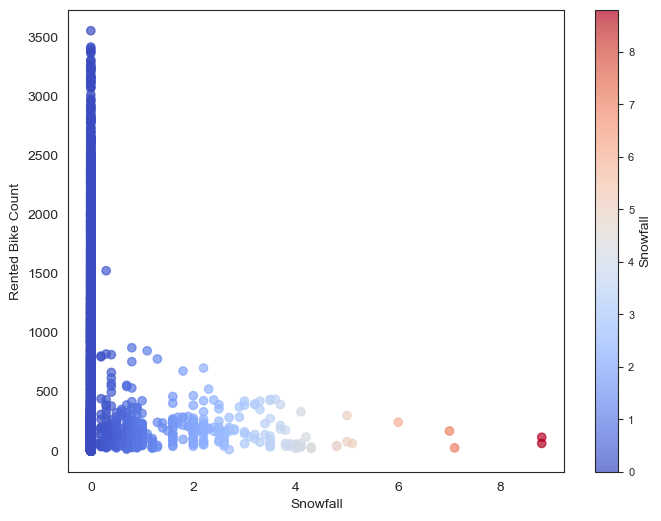

In [20]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df['Snowfall'], df['Rented Bike Count'], c=df['Snowfall'], cmap='coolwarm', alpha=0.7)
cbar = plt.colorbar(scatter, label='Snowfall')

cbar.ax.tick_params(labelsize=8)

plt.xlabel('Snowfall', fontsize=10)
plt.ylabel('Rented Bike Count', fontsize=10)
plt.show()

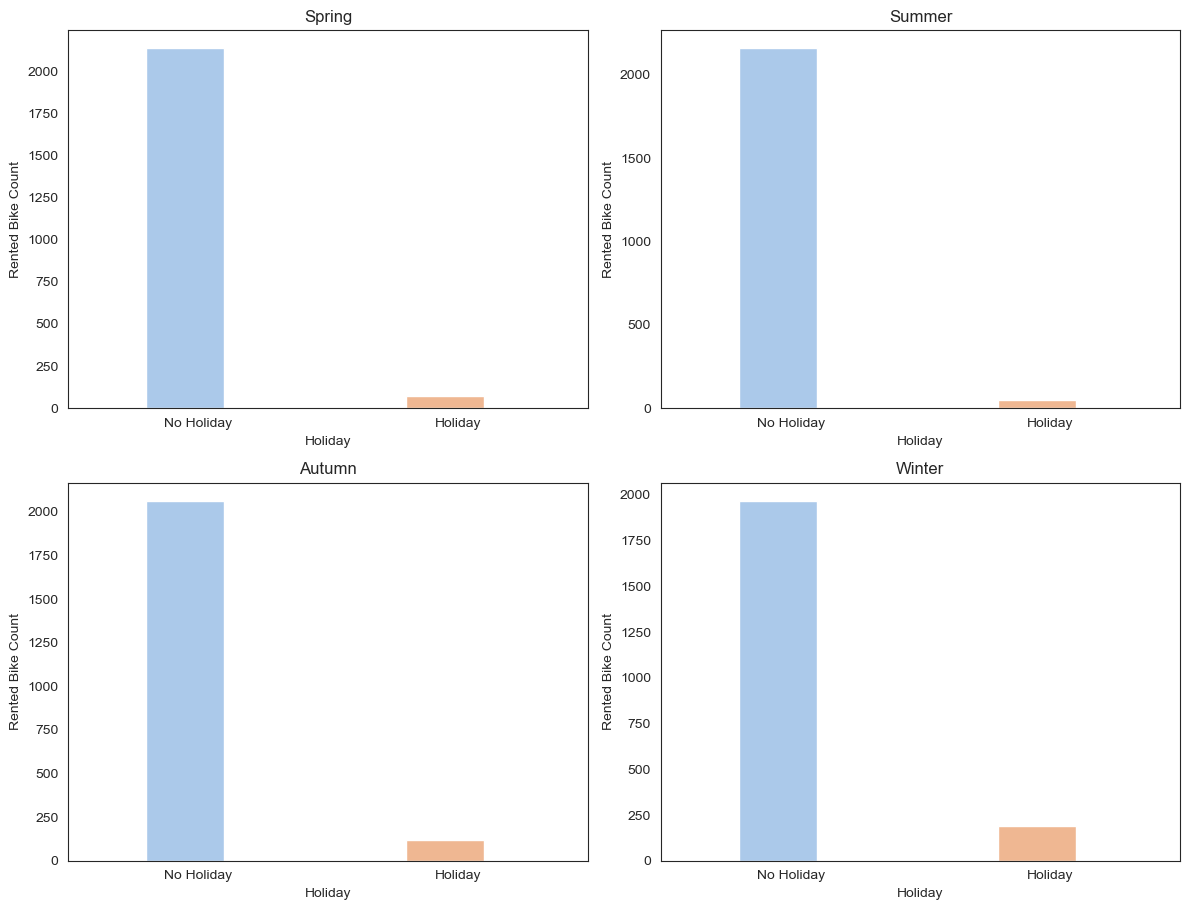

In [21]:
pastel_palette = sns.color_palette("pastel", n_colors=2)

season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, season in enumerate(season_order):
    ax = axes[i // 2, i % 2]
    holiday_counts = df[df['Seasons'] == season]['Holiday'].value_counts()
    
    sns.barplot(x=holiday_counts.index, y=holiday_counts.values, ax=ax, palette=pastel_palette, errorbar=None)
    ax.set_ylabel('Rented Bike Count')
    ax.set_title(season)
    
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - 0.4
        patch.set_width(0.3)
        patch.set_x(patch.get_x() + diff * 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

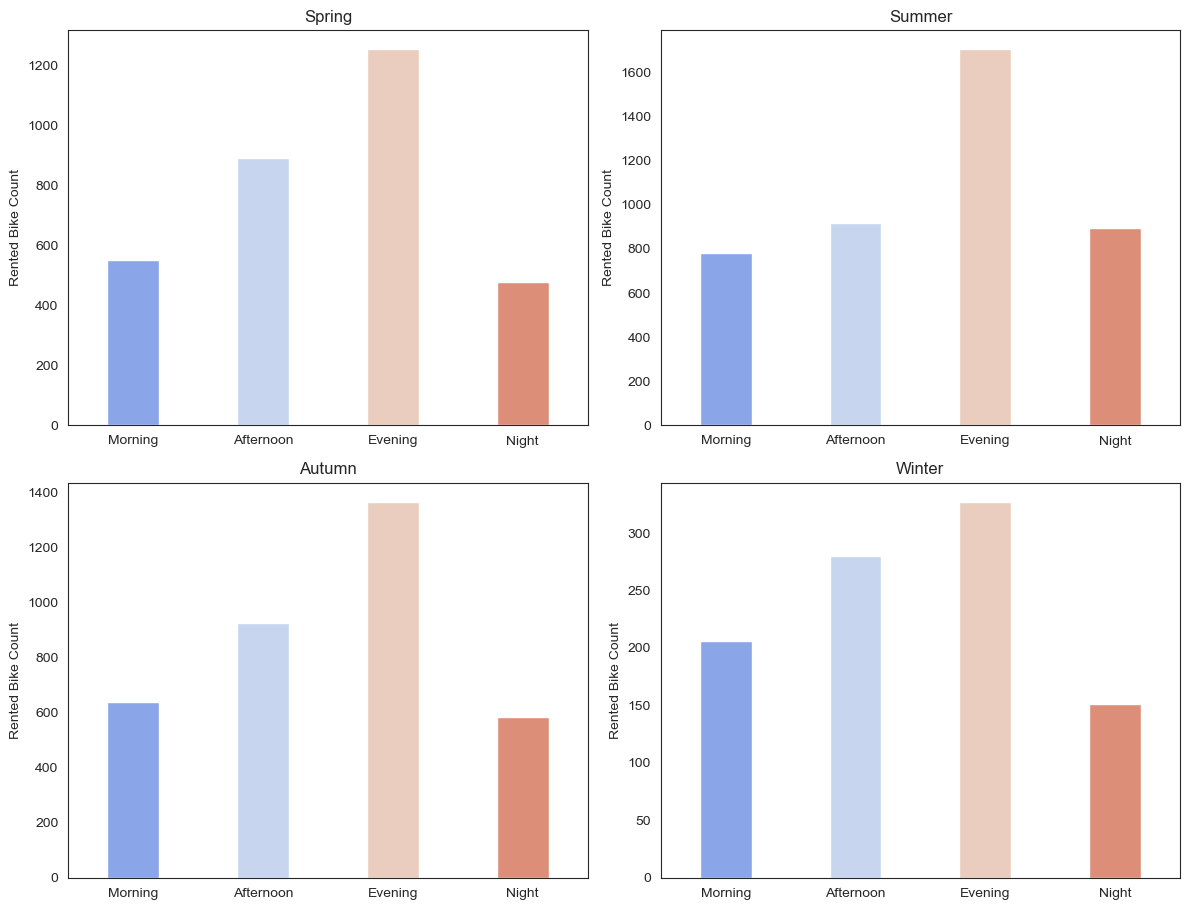

In [22]:
time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
time_of_day_palette = "coolwarm"

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, season in enumerate(season_order):
    ax = axes[i // 2, i % 2]
    data_filtered = df[df['Seasons'] == season]
    
    sns.barplot(x='Time of day', y='Rented Bike Count', data=data_filtered, order=time_of_day_order, palette=time_of_day_palette, ax=ax, width=0.4, errorbar=None)
    ax.set_xlabel('')
    ax.set_ylabel('Rented Bike Count')
    ax.set_title(season)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Feature Scaling

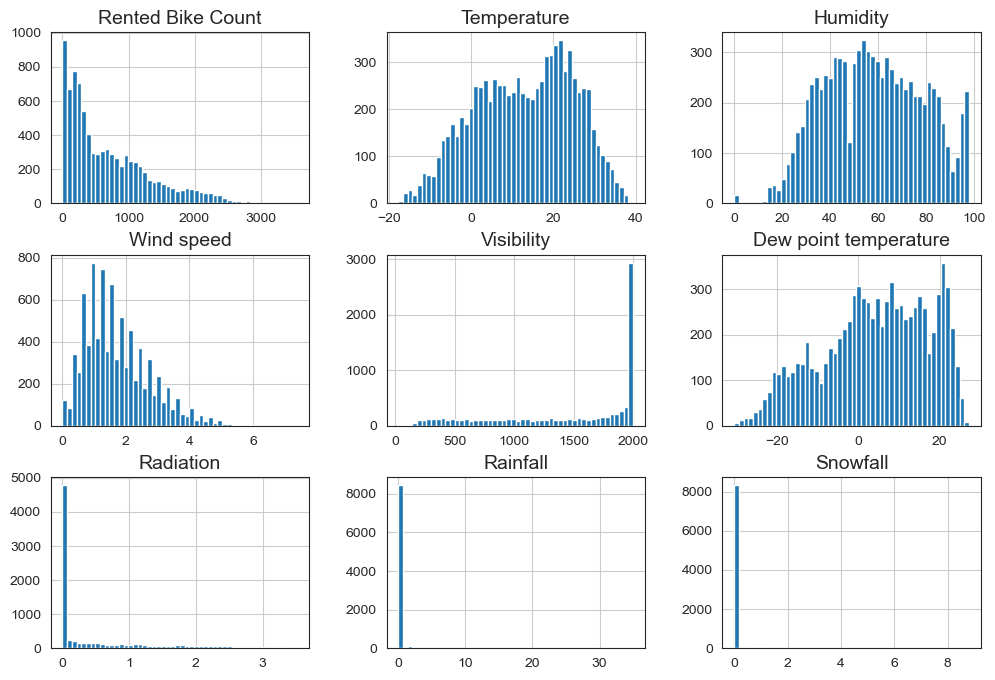

In [23]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

bike_count.hist(bins=50, figsize=(12, 8))
plt.show()

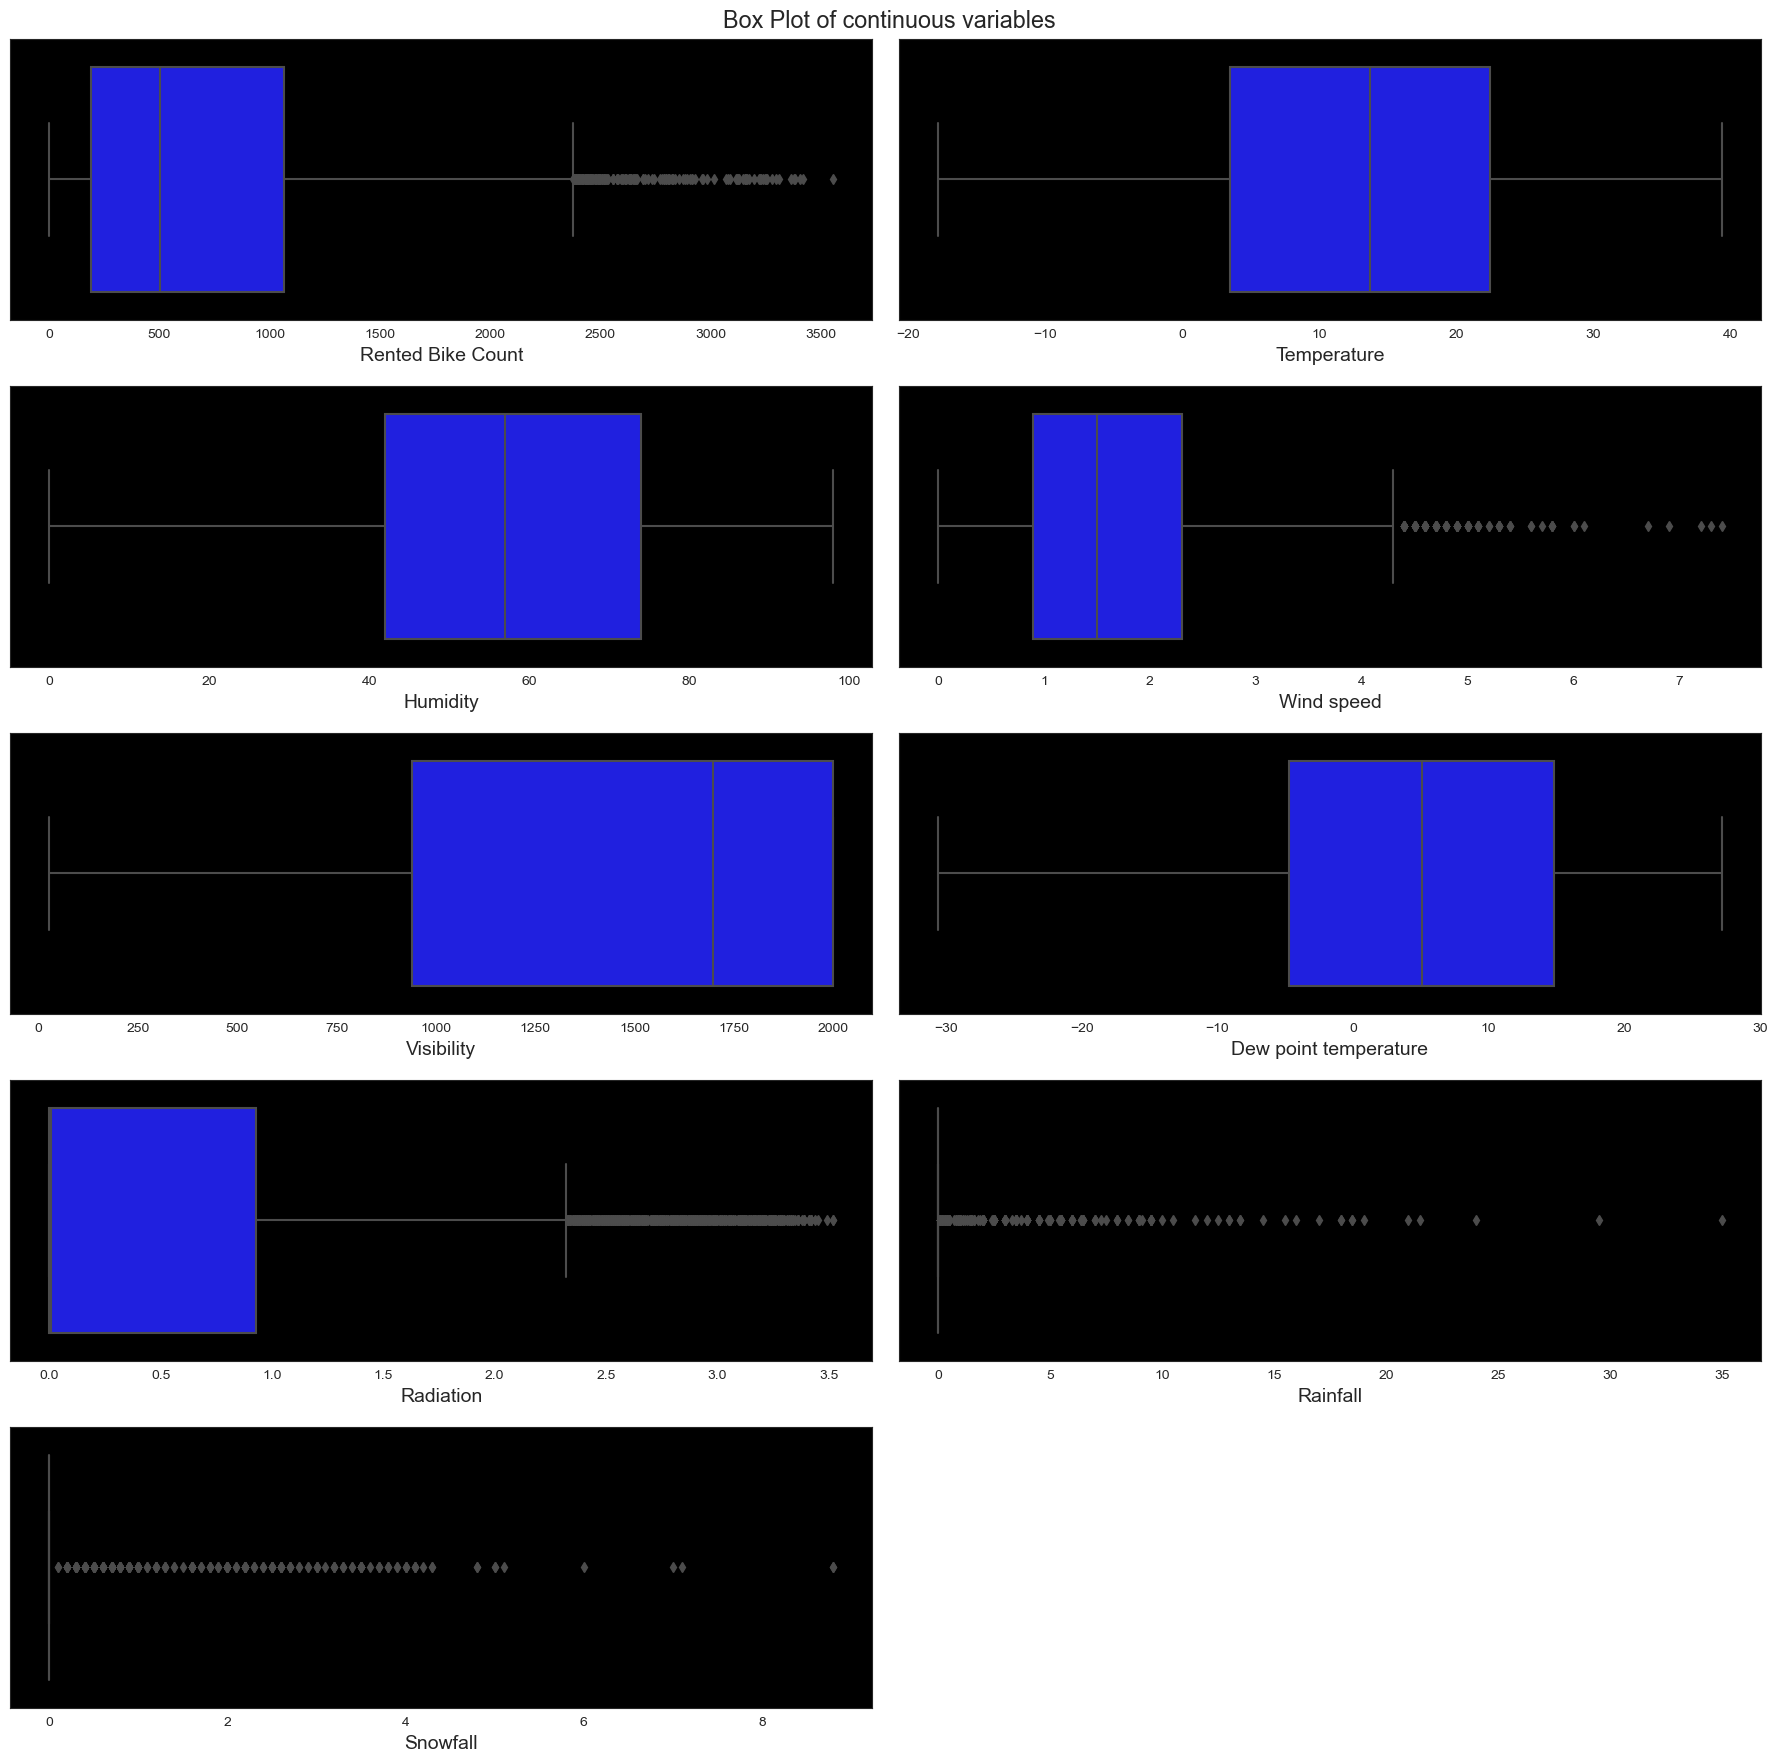

In [24]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_count.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=bike_count, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [25]:
#selecting variables that have data types float and int.
var=list(bike_count.select_dtypes(include=['float64','int64']).columns)
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
bike_count[var]=sc_X.fit_transform(bike_count[var])

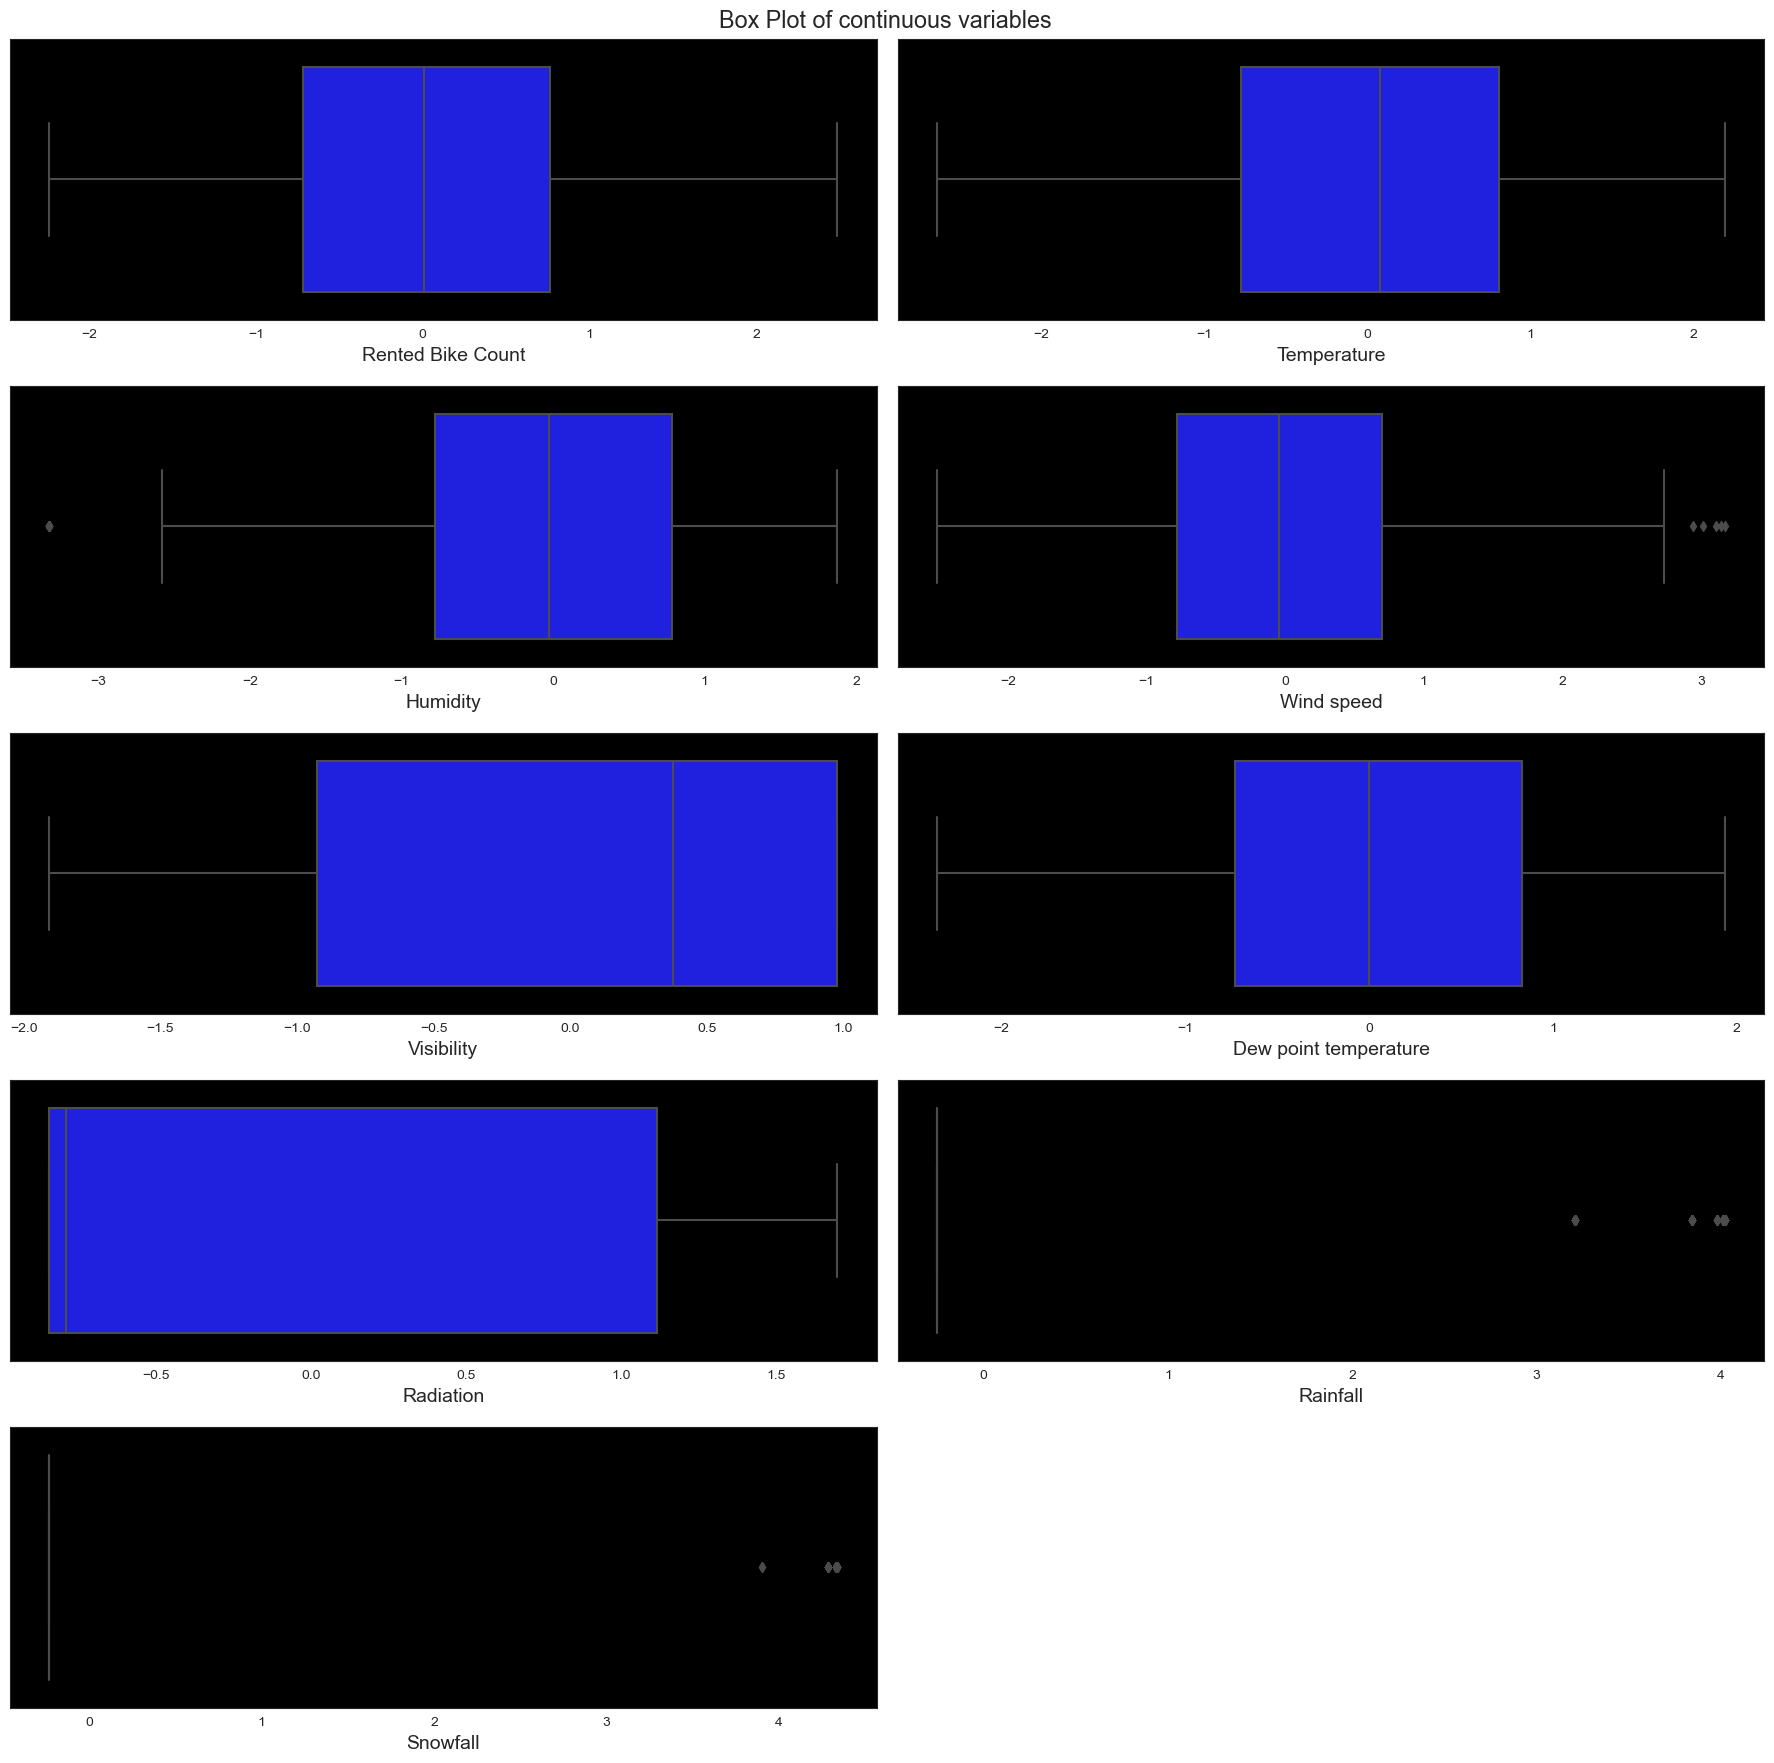

In [26]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(bike_count.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=bike_count, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

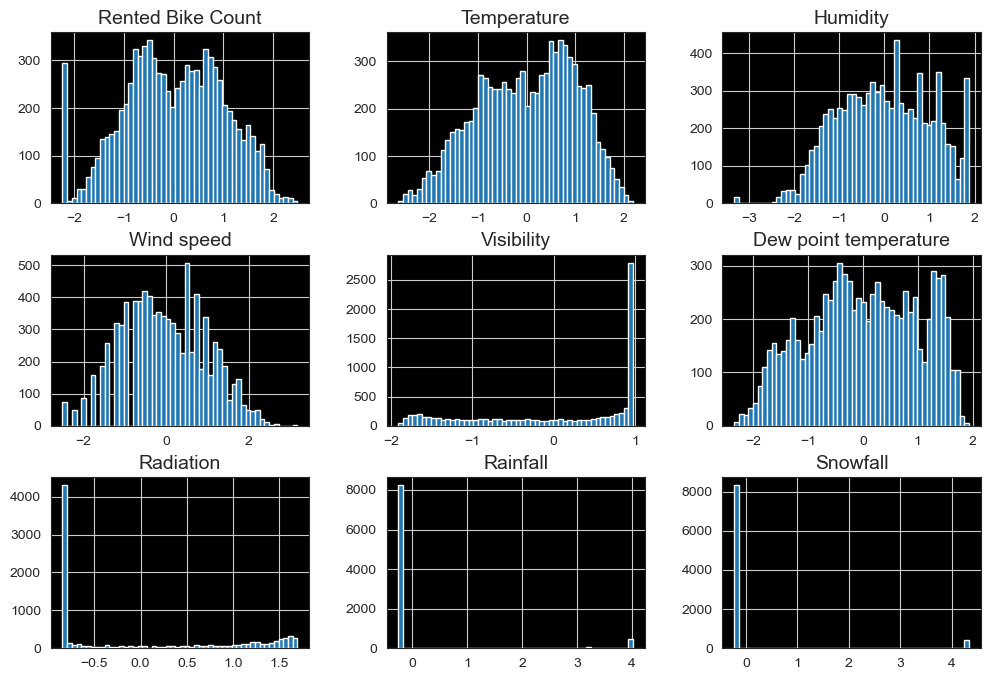

In [27]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

bike_count.hist(bins=50, figsize=(12, 8))
plt.show()

# Feature Engineering 

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns to be one-hot encoded
categorical_columns = ['Time of day', 'Weekday', 'Seasons', 'Holiday']

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(bike_count[categorical_columns])

# Get the one-hot encoded feature names
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame with the one-hot encoded data and feature names
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Drop the original categorical columns from X_train
bike_count = bike_count.drop(categorical_columns, axis=1)

# Concatenate the one-hot encoded DataFrame with the remaining columns in X_train
bike_count = pd.concat([bike_count, encoded_df], axis=1)

C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Feature Selection

In [29]:
numerical_variables = ['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall', 'Snowfall'] 

In [30]:
categorical_variables = ['Rented Bike Count', 'Time of day_Afternoon', 'Time of day_Evening', 'Time of day_Morning', 'Time of day_Night', 'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday','Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday']

In [31]:
df_numerical = bike_count[numerical_variables]
df_categorical = bike_count[categorical_variables]

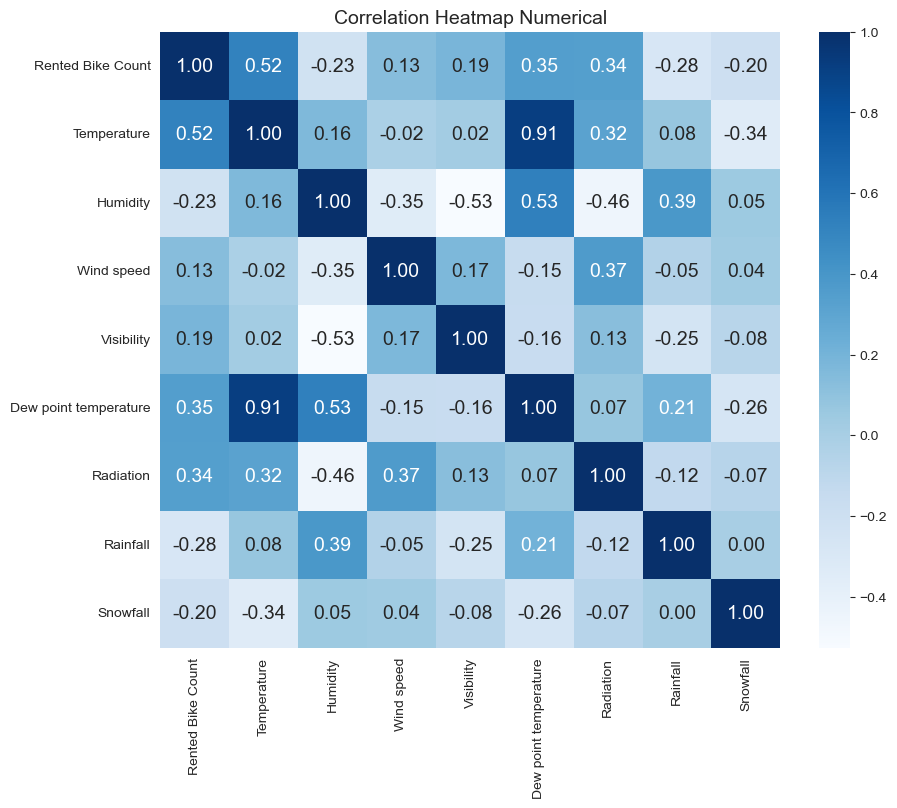

In [32]:
correlation_matrix_numerical = df_numerical.corr()
sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap Numerical')
plt.show()

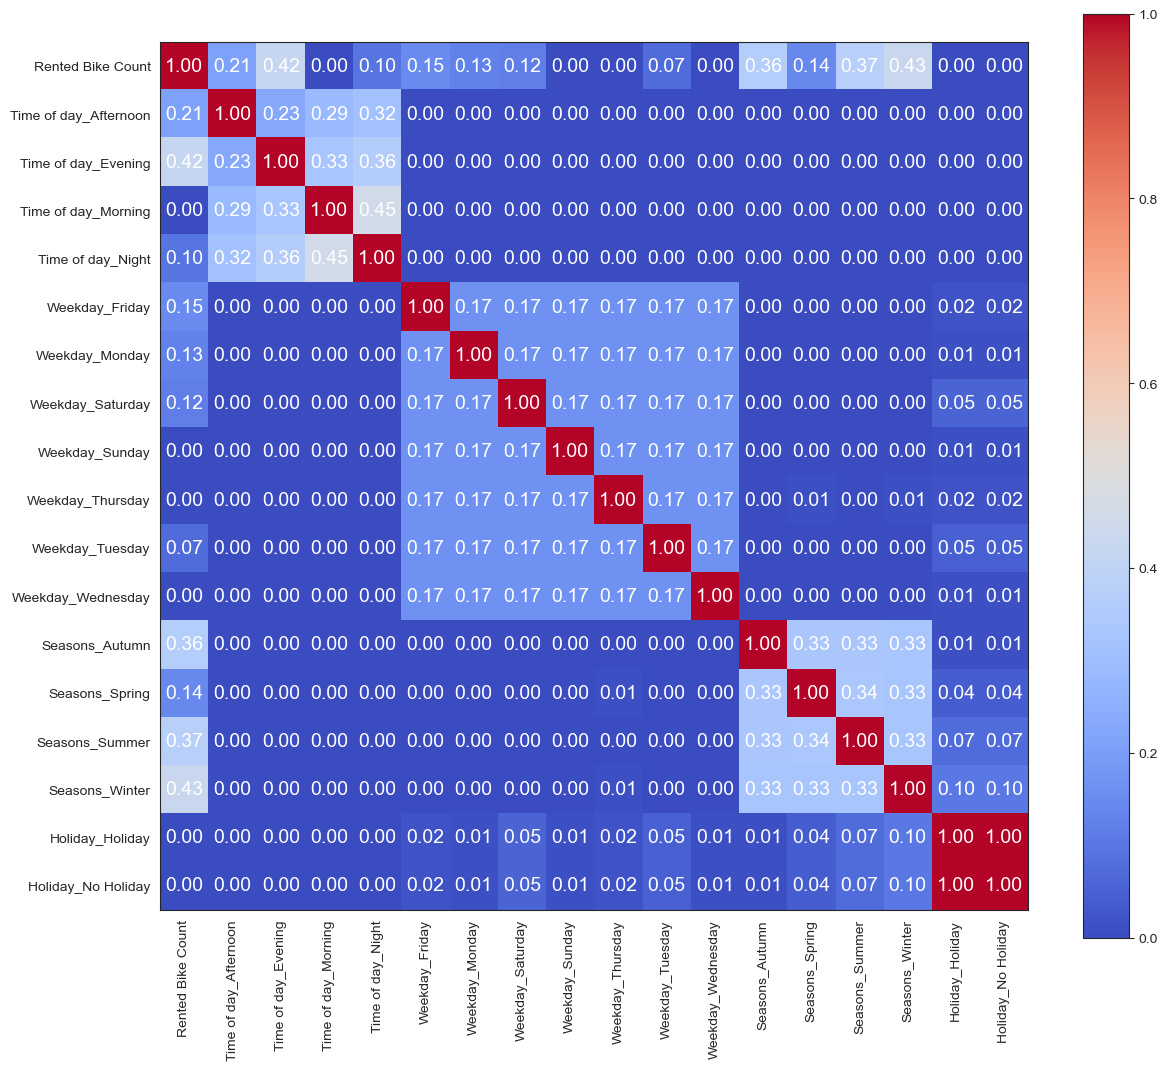

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Convert the index to strings
df_categorical.columns = df_categorical.columns.astype(str)

categorical_cols = df_categorical.columns
cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        confusion_matrix = pd.crosstab(df_categorical[col1], df_categorical[col2])
        cramers_matrix.loc[col1, col2] = cramers_v(confusion_matrix)


cramers_matrix = cramers_matrix.apply(pd.to_numeric)

plt.figure(figsize=(14, 12))
plt.imshow(cramers_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar()

# Add annotations to the cells
for i in range(len(categorical_cols)):
    for j in range(len(categorical_cols)):
        plt.text(j, i, f"{cramers_matrix.iat[i, j]:.2f}", ha='center', va='center', color='w')

plt.xticks(np.arange(len(categorical_cols)), categorical_cols, rotation=90)
plt.yticks(np.arange(len(categorical_cols)), categorical_cols)
plt.show()

In [34]:
bike_count

Rented Bike Count  Temperature  Humidity  Wind speed  Visibility  \
0             -0.530004    -1.524521 -1.038829    0.618103    0.978214   
1             -0.676497    -1.550870 -0.986482   -0.923651    0.978214   
2             -0.779424    -1.594819 -0.934363   -0.640327    0.978214   
3             -1.047379    -1.612409 -0.882465   -0.778203    0.978214   
4             -1.200315    -1.594819 -1.091410    0.700184    0.978214   
...                 ...          ...       ...         ...         ...   
8755           0.695553    -0.715942 -1.197308    0.932074    0.762392   
8756           0.403665    -0.783248 -1.038829    0.700184    0.978214   
8757           0.307082    -0.850709 -0.934363   -1.801586    0.912535   
8758           0.332501    -0.892966 -0.830782   -0.640327    0.692237   
8759           0.141594    -0.909892 -0.728037   -0.265185    0.792629   

      Dew point temperature  Radiation  Rainfall  Snowfall  \
0                 -1.556854  -0.845761 -0.252859 -0.230785   
1                 -1.556854  -0.845761 -0.252859 -0.230785   
2                 -1.563069  -0.845761 -0.252859 -0.230785   
3                 -1.556854  -0.845761 -0.252859 -0.230785   
4                 -1.618915  -0.845761 -0.252859 -0.230785   
...                     ...        ...       ...       ...   
8755              -1.096786  -0.845761 -0.252859 -0.230785   
8756              -1.071138  -0.845761 -0.252859 -0.230785   
8757              -1.071138  -0.845761 -0.252859 -0.230785   
8758              -1.064717  -0.845761 -0.252859 -0.230785   
8759              -1.032557  -0.845761 -0.252859 -0.230785   

      Time of day_Afternoon  ...  Weekday_Sunday  Weekday_Thursday  \
0                       0.0  ...             0.0               0.0   
1                       0.0  ...             0.0               0.0   
2                       0.0  ...             0.0               0.0   
3                       0.0  ...             0.0               0.0   
4                       0.0  ...             0.0               0.0   
...                     ...  ...             ...               ...   
8755                    0.0  ...             0.0               0.0   
8756                    0.0  ...             0.0               0.0   
8757                    0.0  ...             0.0               0.0   
8758                    0.0  ...             0.0               0.0   
8759                    0.0  ...             0.0               0.0   

      Weekday_Tuesday  Weekday_Wednesday  Seasons_Autumn  Seasons_Spring  \
0                 0.0                0.0             0.0             0.0   
1                 0.0                0.0             0.0             0.0   
2                 0.0                0.0             0.0             0.0   
3                 0.0                0.0             0.0             0.0   
4                 0.0                0.0             0.0             0.0   
...               ...                ...             ...             ...   
8755              0.0                0.0             1.0             0.0   
8756              0.0                0.0             1.0             0.0   
8757              0.0                0.0             1.0             0.0   
8758              0.0                0.0             1.0             0.0   
8759              0.0                0.0             1.0             0.0   

      Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  
0                0.0             1.0              0.0                 1.0  
1                0.0             1.0              0.0                 1.0  
2                0.0             1.0              0.0                 1.0  
3                0.0             1.0              0.0                 1.0  
4                0.0             1.0              0.0                 1.0  
...              ...             ...              ...                 ...  
8755             0.0             0.0              0.0                 1.0  
8756      

In [35]:
bike_count.drop(columns=[ 'Dew point temperature','Radiation', 'Holiday_No Holiday','Holiday_Holiday' ,'Humidity'], inplace=True)

# Splitting datasets into training & train

In [36]:
bike_data = bike_count.drop("Rented Bike Count", axis=1)
bike_target = bike_count["Rented Bike Count"].copy()

In [37]:
bike_target

0      -0.530004
1      -0.676497
2      -0.779424
3      -1.047379
4      -1.200315
          ...   
8755    0.695553
8756    0.403665
8757    0.307082
8758    0.332501
8759    0.141594
Name: Rented Bike Count, Length: 8760, dtype: float64

In [38]:
bike_data

Temperature  Wind speed  Visibility  Rainfall  Snowfall  \
0       -1.524521    0.618103    0.978214 -0.252859 -0.230785   
1       -1.550870   -0.923651    0.978214 -0.252859 -0.230785   
2       -1.594819   -0.640327    0.978214 -0.252859 -0.230785   
3       -1.612409   -0.778203    0.978214 -0.252859 -0.230785   
4       -1.594819    0.700184    0.978214 -0.252859 -0.230785   
...           ...         ...         ...       ...       ...   
8755    -0.715942    0.932074    0.762392 -0.252859 -0.230785   
8756    -0.783248    0.700184    0.978214 -0.252859 -0.230785   
8757    -0.850709   -1.801586    0.912535 -0.252859 -0.230785   
8758    -0.892966   -0.640327    0.692237 -0.252859 -0.230785   
8759    -0.909892   -0.265185    0.792629 -0.252859 -0.230785   

      Time of day_Afternoon  Time of day_Evening  Time of day_Morning  \
0                       0.0                  0.0                  0.0   
1                       0.0                  0.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  0.0                  0.0   
4                       0.0                  0.0                  0.0   
...                     ...                  ...                  ...   
8755                    0.0                  1.0                  0.0   
8756                    0.0                  1.0                  0.0   
8757                    0.0                  0.0                  0.0   
8758                    0.0                  0.0                  0.0   
8759                    0.0                  0.0                  0.0   

      Time of day_Night  Weekday_Friday  Weekday_Monday  Weekday_Saturday  \
0                   1.0             1.0             0.0               0.0   
1                   1.0             1.0             0.0               0.0   
2                   1.0             1.0             0.0               0.0   
3                   1.0             1.0             0.0               0.0   
4                   1.0             1.0             0.0               0.0   
...                 ...             ...             ...               ...   
8755                0.0             1.0             0.0               0.0   
8756                0.0             1.0             0.0               0.0   
8757                1.0             1.0             0.0               0.0   
8758                1.0             1.0             0.0               0.0   
8759                1.0             1.0             0.0               0.0   

      Weekday_Sunday  Weekday_Thursday  Weekday_Tuesday  Weekday_Wednesday  \
0                0.0               0.0              0.0                0.0   
1                0.0               0.0              0.0                0.0   
2                0.0               0.0              0.0                0.0   
3                0.0               0.0              0.0                0.0   
4                0.0               0.0              0.0                0.0   
...              ...               ...              ...                ...   
8755             0.0               0.0              0.0                0.0   
8756             0.0               0.0              0.0                0.0   
8757             0.0               0.0              0.0                0.0   
8758             0.0               0.0              0.0                0.0   
8759             0.0               0.0              0.0                0.0   

      Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0                0.0             0.0             0.0             1.0  
1                0.0             0.0             0.0             1.0  
2                0.0             0.0             0.0             1.0  
3                0.0             0.0             0.0             1.0  
4                0.0             0.0             0.0             1.0  
...              ...             ...             ...        

In [39]:
from sklearn import model_selection
X_trainn, X_testt, Y_trainn, Y_testt = model_selection.train_test_split(bike_data, bike_target, test_size=0.2, random_state = 42)

In [40]:
#converting NaN to 0
X_trainn = X_trainn.fillna(0)
X_testt = X_testt.fillna(0)
Y_trainn = Y_trainn.fillna(0)
Y_testt = Y_testt.fillna(0)

# Supervised Machine learning

# Building Linear Regression Model

Building and evaluating using RMSE, MSE, R-Square & R Square adjusted score

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_trainn, Y_trainn)

Y_train_pred = model.predict(X_trainn)
num_predictors = X_trainn.shape[1]
num_samples = X_trainn.shape[0]

#degrees of freedom
df = num_samples - num_predictors - 1

# Evaluate the model on the training data
mse = mean_squared_error(Y_trainn, Y_train_pred)
r2 = r2_score(Y_trainn, Y_train_pred)
adjusted_r2 = 1 - (1 - r2) * (num_samples - 1) / df
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("R-squared (R2) Score:", adjusted_r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.5499435014448815
R-squared (R2) Score: 0.4518089090247257
R-squared (R2) Score: 0.4502397345836916
Root Mean Squared Error (RMSE): 0.7415817564131965


Evaluating on test set

In [42]:
# Make predictions on the test data
Y_test_pred = model.predict(X_testt)

# Evaluate the model on the test data
mse_test = mean_squared_error(Y_testt, Y_test_pred)
r2_test = r2_score(Y_testt, Y_test_pred)

rmse_test = np.sqrt(mse_test)

# Print evaluation metrics for the test data
print("Mean Squared Error (MSE) on Test Data:", mse_test)
print("R-squared (R2) Score on Test Data:", r2_test)
print("Root Mean Squared Error (RMSE) on Test Data:", rmse_test)

Mean Squared Error (MSE) on Test Data: 0.5309933012359203
R-squared (R2) Score on Test Data: 0.46212610460542813
Root Mean Squared Error (RMSE) on Test Data: 0.728692871679091


# Cross validating using K-folds cross validation

In [43]:
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
 
 
# Define the number of folds for k-fold cross-validation
num_folds = 5
 
# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
 
# Create lists to store evaluation metrics for each fold
mse_values = []
r2_values = []

data_kFolds = bike_count.values[:,1:25]
target = bike_count.values[:,0]

# Create an instance of the SimpleImputer with the 'constant' strategy to fill missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X = bike_data.to_numpy()  # Convert your DataFrame to a numpy array
Y = bike_target.to_numpy()  # Convert your target variable to a numpy array

for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for the current fold
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index]

    # Fit the imputer on the training data within the fold
    imputer.fit(X_train_fold)

    # Apply imputation to the training and test data within the fold
    X_train_fold = imputer.transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    # Create and fit a Linear Regression model
    model = LinearRegression()
    model.fit(X_train_fold, Y_train_fold)

    # Make predictions on the test data
    Y_test_pred = model.predict(X_test_fold)

    # Evaluate the model and append metrics to the lists
    mse = mean_squared_error(Y_test_fold, Y_test_pred)
    r2 = r2_score(Y_test_fold, Y_test_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Calculate the mean of evaluation metrics across all folds
mean_mse = np.mean(mse_values)
mean_r2 = np.mean(r2_values)

print("Mean Cross-Validated Mean Squared Error (MSE):", mean_mse)
print("Mean Cross-Validated R-squared (R2) Score:", mean_r2)

Mean Cross-Validated Mean Squared Error (MSE): 0.5477086693848918
Mean Cross-Validated R-squared (R2) Score: 0.4526211563129012


# Building DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Fit the Decision Tree Regressor on the training data
tree_regressor.fit(X_trainn, Y_trainn)

# Make predictions on the test data
Y_test_pred = tree_regressor.predict(X_testt)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_testt, Y_test_pred)
print("Mean Squared Error (MSE) on the test set:", mse)

Mean Squared Error (MSE) on the test set: 0.8262920481208494


# Cross validating using K-folds cross validation

In [45]:
# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Initialize lists to store the predictions and true values
predictions = []
true_values = []

# Define the number of splits for K-Fold cross-validation
n_splits = 5  # You can adjust this number as needed

# Initialize the K-Fold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Split the dataset using K-Fold cross-validation
for train_index, test_index in kfold.split(bike_data, bike_target):
    X_train_fold = bike_data.iloc[train_index].copy()
    Y_train_fold = bike_target.iloc[train_index].copy()
    X_test_fold = bike_data.iloc[test_index].copy()
    Y_test_fold = bike_target.iloc[test_index].copy()
    
    
    # Fit the Decision Tree Regressor on the training data
    tree_regressor.fit(X_train_fold, Y_train_fold)
    
    # Make predictions on the test data
    Y_test_pred = tree_regressor.predict(X_test_fold)
    
    # Append the predictions and true values to the lists
    predictions.extend(Y_test_pred)
    true_values.extend(Y_test_fold)

# Calculate Mean Squared Error
mse = mean_squared_error(true_values, predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.7847850474874404


# Building HistogramGradientBoostingRegressor

In [46]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
# Initialize the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_trainn, Y_trainn)

# Make predictions on the test data
Y_test_pred = model.predict(X_testt)

# Calculate and print the mean squared error
mse = mean_squared_error(Y_testt, Y_test_pred)
print("Mean Squared Error:", mse)

C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Mean Squared Error: 0.420652420954558


In [47]:
# Initialize the HistGradientBoostingRegressor
hist_gradient_regressor = HistGradientBoostingRegressor()

# Initialize lists to store the predictions and true values
predictions = []
true_values = []

# Define the number of splits for K-Fold cross-validation
n_splits = 5  # You can adjust this number as needed

# Initialize the K-Fold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Split the dataset using K-Fold cross-validation
for train_index, test_index in kfold.split(bike_data, bike_target):
    X_train_fold = bike_data.iloc[train_index].copy()
    Y_train_fold = bike_target.iloc[train_index].copy()
    X_test_fold = bike_data.iloc[test_index].copy()
    Y_test_fold = bike_target.iloc[test_index].copy()
    
    
    # Fit the HistGradientBoostingRegressor on the training data
    hist_gradient_regressor.fit(X_train_fold, Y_train_fold)
    
    # Make predictions on the test data
    Y_test_pred = hist_gradient_regressor.predict(X_test_fold)
    
    # Append the predictions and true values to the lists
    predictions.extend(Y_test_pred)
    true_values.extend(Y_test_fold)

# Calculate Mean Squared Error
mse = mean_squared_error(true_values, predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.41334207476514334


# Unsupervised Learning

In [48]:
#Importing necessary libraries
from sklearn import cluster
from sklearn.preprocessing import scale

In [49]:
#Preparing dataset

In [50]:
data_unsupervised = bike_count.values[:,1:25]

In [51]:
data_unsupervised

array([[-1.52452141,  0.61810307,  0.97821384, ...,  0.        ,
         0.        ,  1.        ],
       [-1.55087024, -0.92365142,  0.97821384, ...,  0.        ,
         0.        ,  1.        ],
       [-1.59481869, -0.64032653,  0.97821384, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.85070935, -1.80158616,  0.912535  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.89296632, -0.64032653,  0.69223715, ...,  0.        ,
         0.        ,  0.        ],
       [-0.90989244, -0.26518524,  0.79262869, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
target = bike_count.values[:,0]
print(target)

[-0.5300044  -0.67649738 -0.77942415 ...  0.3070821   0.33250099
  0.14159405]


In [53]:
#scaled_data = scale(data_unsupervised.data)

In [54]:
#scaled_data

In [55]:
# the shape of the dataset
n_samples, n_features = data_unsupervised.shape
print("number of rows:", n_samples)
print("number of features:", n_features)

# the following instruction will return the number of different values in the target feature
n_digits = len(np.unique(target))

# n_digits will be used as the number of clusters 
print("number of different values for the target:", n_digits)

number of rows: 8760
number of features: 20
number of different values for the target: 2166


# AgglomerativeClustering 

In [56]:
#AgglomerativeClustering Model creation
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", metric="euclidean")


# fit the model to the data
model.fit(data_unsupervised)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=2166)

In [57]:
#the silhouette score
print("Silhouette Coefficient:", metrics.silhouette_score(data_unsupervised, model.labels_))

# calinski_harabasz_score
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(data_unsupervised, model.labels_))

Silhouette Coefficient: 0.3905356999503101
Calinski_harabasz Coefficient: 235.35195301384348


In [58]:
#the completeness and the homogeneity scores
print("Completeness score", metrics.completeness_score(target, model.labels_))
print("Homogeneity score", metrics.homogeneity_score(target, model.labels_))

Completeness score 0.7596436459310151
Homogeneity score 0.7666140925249271


C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


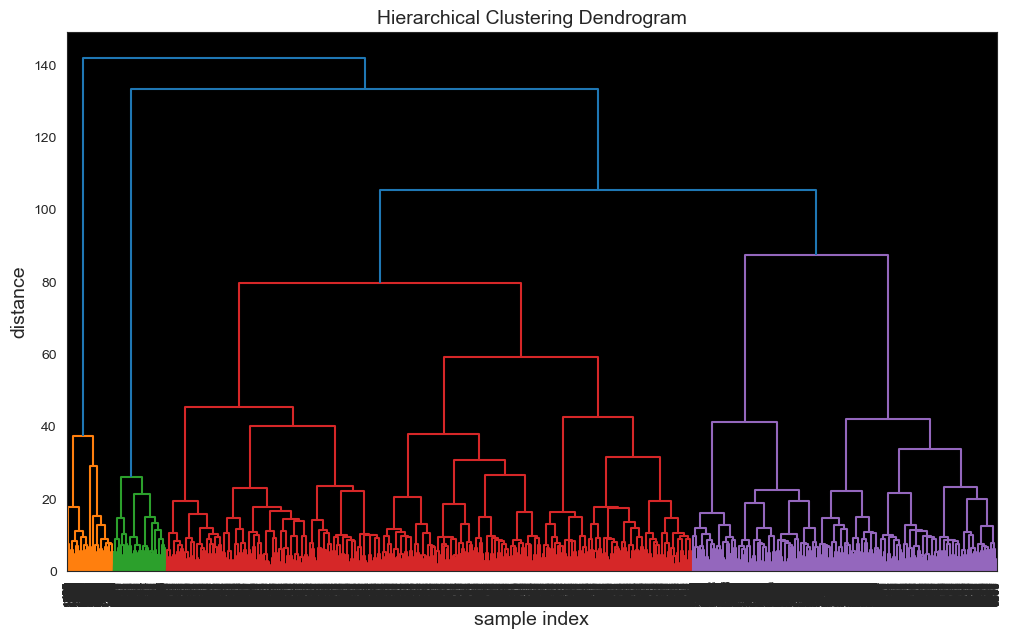

In [59]:
#dendrogram 
from scipy.cluster.hierarchy import dendrogram, linkage

# in this example, we are using ward as linkage as it is more appropriate for this dataset
model = linkage(data_unsupervised, 'ward')

plt.figure(figsize=(12,7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

# K-means Clustering

In [60]:
kmeans = cluster.KMeans(n_clusters=n_digits)

#fit the model to the data
kmeans.fit(data_unsupervised)
print(kmeans.get_params())

C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2166, 'n_init': 'warn', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [61]:
# silhouette score
print("Silhouette Coefficient:", metrics.silhouette_score(data_unsupervised, kmeans.labels_))

# calinski_harabasz_score
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(data_unsupervised, kmeans.labels_))

Silhouette Coefficient: 0.38364146458187914
Calinski_harabasz Coefficient: 250.34937298715786


In [62]:
#completeness and the homogeneity scores
print("Completeness score", metrics.completeness_score(target, kmeans.labels_))
print("Homogeneity score", metrics.homogeneity_score(target, kmeans.labels_))

Completeness score 0.7639099115572882
Homogeneity score 0.7873973197791058


C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [63]:
# For this dataset, we have 20 features, so we are picking randomly the 3rd and the 5th features

indexFeature1 = 2
indexFeature2 = 4
# Getting unique labels
labels = kmeans.labels_

u_labels = np.unique(labels)
#plotting the results
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# for each label in u_labels
for i in u_labels:
    plt.scatter(data_unsupervised[labels == i , indexFeature1] , data_unsupervised[labels == i , indexFeature2] , label = i)
plt.legend()
plt.show()

In [64]:
from sklearn.decomposition import PCA

# Transform the data 
pca = PCA(2) # create an empty PCA with 2 features
data2F = pca.fit_transform(data_unsupervised) 

print(data_unsupervised.shape)
print(data2F.shape)

(8760, 20)
(8760, 2)


In [65]:
kmeans2F = cluster.KMeans(n_clusters=n_digits)

kmeans2F.fit(data2F)
print(kmeans.get_params())

C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2166, 'n_init': 'warn', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [66]:
print("Silhouette Coefficient:", metrics.silhouette_score(data2F, kmeans2F.labels_))
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(data2F, kmeans2F.labels_))

Silhouette Coefficient: 0.3780071566547356
Calinski_harabasz Coefficient: 14771.812926524817


In [67]:
print("Completeness score", metrics.completeness_score(target, kmeans2F.labels_))
print("Homogeneity score", metrics.homogeneity_score(target, kmeans2F.labels_))


Completeness score 0.7610316159655839
Homogeneity score 0.7849212831795233


C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [68]:
indexFeature1 = 0
indexFeature2 = 1

labels = kmeans2F.labels_

u_labels = np.unique(labels)

fig = plt.gcf()
fig.set_size_inches(16, 9)

for i in u_labels:

    plt.scatter(data2F[labels == i , indexFeature1] , data2F[labels == i , indexFeature2] , label = i)
plt.legend()
plt.show()

